<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/Lab_4/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matrix Solution for Multiple Regression**
This notebook demonstrates how to solve a multiple regression problem using matrix operations in Python. We will manually implement the normal equation to find the coefficients for a regression model with two predictors.

## Problem Setup
We have two predictors (X1, X2) and one response variable (Y). The goal is to fit a linear model of the form:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

Using the normal equation:

$$
\mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

## Step 1: Define Data
We will simulate a small dataset with 5 observations for two predictors (X1, X2) and the response variable (Y).




In [22]:
import numpy as np

# Simulated data for two predictors (X1, X2) and one response (Y)
# We will have 5 observations
X1 = np.array([10, 12, 14, 16, 18])
X2 = np.array([5, 7, 10, 12, 15])
Y = np.array([40, 50, 60, 70, 80])

# Display the data
print("X1:", X1)
print("X2:", X2)
print("Y:", Y)

X1: [10 12 14 16 18]
X2: [ 5  7 10 12 15]
Y: [40 50 60 70 80]


## Step 2: Construct the Design Matrix
We add a column of ones to account for the intercept term.

In [21]:
# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X = np.column_stack((np.ones(len(X1)), X1, X2))

# Display the design matrix
print("Design Matrix (X):")
print(X)


Design Matrix (X):
[[ 1. 10.  5.]
 [ 1. 12.  7.]
 [ 1. 14. 10.]
 [ 1. 16. 12.]
 [ 1. 18. 15.]]


## Step 3: Solve the Normal Equation
We use the normal equation to solve for the regression coefficients

$$
\mathbf{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

In [20]:
# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y

# X^T X
X_transpose_X = np.dot(X.T, X)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X.T, Y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)


Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]


## Step 4: Predict the Response Values
Using the calculated coefficients, we predict the response values $\hat(Y) $


In [19]:
# Step 4: Use the coefficients to predict Y
Y_pred = np.dot(X, beta)

print("Predicted Y:", Y_pred)
print("Actual Y:", Y)


Predicted Y: [40. 50. 60. 70. 80.]
Actual Y: [40 50 60 70 80]


## Step 5: Calculate Residuals
The residuals are the differences between the actual and predicted values of 𝑌


In [23]:
# Calculate the residuals (errors)
residuals = Y - Y_pred
print("Residuals (errors):", residuals)


Residuals (errors): [-1.79056769e-12 -3.07665005e-12 -8.60467253e-12 -9.89075488e-12
 -1.54045665e-11]


All the code in a single code block below:

In [24]:
import numpy as np

# Simulated data for two predictors (X1, X2) and one response (Y)
# We will have 5 observations
X1 = np.array([10, 12, 14, 16, 18])
X2 = np.array([5, 7, 10, 12, 15])
Y = np.array([40, 50, 60, 70, 80])

# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X = np.column_stack((np.ones(len(X1)), X1, X2))

# Display the design matrix
print("Design Matrix (X):")
print(X)

# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y
# X^T X
X_transpose_X = np.dot(X.T, X)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X.T, Y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)

# Step 3: Use the coefficients to predict Y
Y_pred = np.dot(X, beta)

print("Predicted Y:", Y_pred)
print("Actual Y:", Y)

# Step 4: Calculate the residuals (errors)
residuals = Y - Y_pred
print("Residuals (errors):", residuals)


Design Matrix (X):
[[ 1. 10.  5.]
 [ 1. 12.  7.]
 [ 1. 14. 10.]
 [ 1. 16. 12.]
 [ 1. 18. 15.]]
Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]
Predicted Y: [40. 50. 60. 70. 80.]
Actual Y: [40 50 60 70 80]
Residuals (errors): [-1.79056769e-12 -3.07665005e-12 -8.60467253e-12 -9.89075488e-12
 -1.54045665e-11]


### **Lets try a real data set to see if this code works...**
And compare results to scikit-learn LinearRegression results

Residuals (errors): 0        -41043.299531
1        -41253.678804
2        -30747.043599
3       -107338.274737
4        -61667.847208
             ...      
16995    -33155.182877
16996    -71522.458196
16997    -68373.999403
16998    -41801.497880
16999    -77888.964369
Name: median_house_value, Length: 17000, dtype: float64
Coefficients (Intercept, beta_1, beta_2): [-1.00000000e+01  5.00000000e+00  4.24460467e-12]
Predicted Y: [107943.2995309  121353.67880374 116447.04359923 ... 171973.99940287
 127601.49787975 172488.96436867]
Actual Y: 0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64
R-squared (R^2): 0.4794361807142098


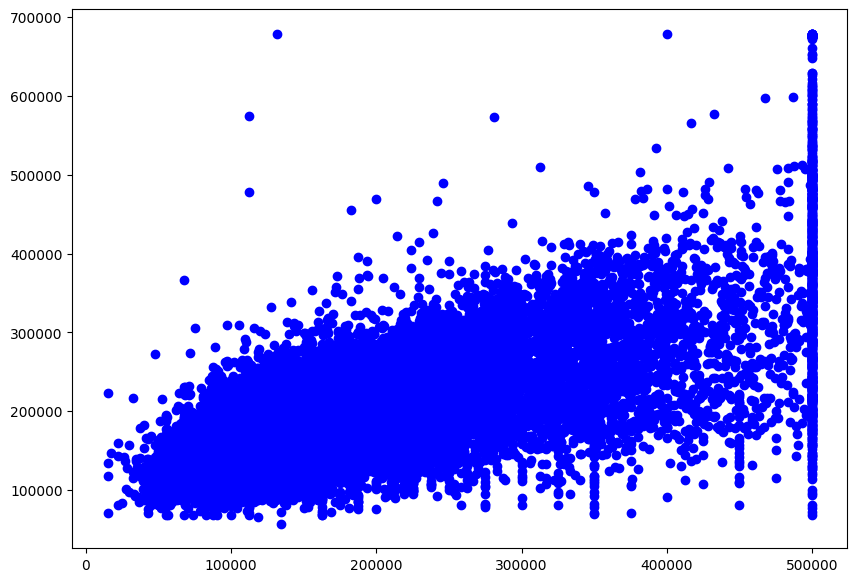

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Get the adult.csv from GitHub repo
# URL to the raw CSV file in the GitHub repo
file_path = "/content/sample_data/california_housing_train.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

## Lets assess how the data provided help explain median_house_value

# Display the first few rows of the DataFrame
df.head()

# df = pd.DataFrame(data)
df.replace('?', np.nan, inplace=True)

np.random.seed(42)  # For reproducibility


# Independent variables (predictors)
X = df[['population', 'median_income']]

# Dependent variable (response)
y = df['median_house_value']

# Step 1. Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 2. Display the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Step 3. Predict the response
y_pred = model.predict(X)

# Step 4: Calculate the residuals (errors)
residuals = y - y_pred
print("Residuals (errors):", residuals)


# Step 6: Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y - y_pred)**2)

# Step 7: Calculate Total Sum of Squares (TSS)
y_mean = np.mean(y)
TSS = np.sum((y - y_mean)**2)

# Step 8: Calculate R-squared (R^2)
R_squared = 1 - (RSS / TSS)

# Output the results
print("Coefficients (Intercept, beta_1, beta_2):", beta)
print("Predicted Y:", y_pred)
print("Actual Y:", y)
print("R-squared (R^2):", R_squared)

# Plot Actual vs Predicted Y
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot the actual data points
ax.scatter(y, y_pred,color='blue', label='Observed vs Predicted Response')


 ### **Now our code**

In [39]:
# Step 1: Construct the design matrix X (with an intercept column of ones)
# X = [1  X1  X2]
X1 = np.column_stack((np.ones(len(X)), X))
y1 = y
# Display the design matrix
print("Design Matrix (X):")
print(X1)

# Step 2: Compute the normal equation: beta = (X^T X)^(-1) X^T Y
# X^T X
X_transpose_X = np.dot(X1.T, X1)

# (X^T X)^(-1)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# X^T Y
X_transpose_Y = np.dot(X1.T, y)

# Calculate beta (the coefficients)
beta = np.dot(X_transpose_X_inv, X_transpose_Y)

# Display the coefficients
print("Coefficients (Intercept, beta_1, beta_2):", beta)

# Step 3: Use the coefficients to predict Y
y1_pred = np.dot(X1, beta)

print("Predicted Y:", y1_pred)
print("Actual Y:", y1)

# Step 4: Calculate the residuals (errors)
residuals = y1 - y1_pred
print("Residuals (errors):", residuals)

# Step 5: Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y1 - y1_pred)**2)

# Step 7: Calculate Total Sum of Squares (TSS)
y1_mean = np.mean(y1)
TSS = np.sum((y1 - y1_mean)**2)

# Step 8: Calculate R-squared (R^2)
R_squared = 1 - (RSS / TSS)

# Output the results
print("Coefficients (Intercept, beta_1, beta_2):", beta)
print("Predicted Y:", y1_pred)
print("Actual Y:", y1)
print("R-squared (R^2):", R_squared)

Design Matrix (X):
[[1.0000e+00 1.0150e+03 1.4936e+00]
 [1.0000e+00 1.1290e+03 1.8200e+00]
 [1.0000e+00 3.3300e+02 1.6509e+00]
 ...
 [1.0000e+00 1.2440e+03 3.0313e+00]
 [1.0000e+00 1.2980e+03 1.9797e+00]
 [1.0000e+00 8.0600e+02 3.0147e+00]]
Coefficients (Intercept, beta_1, beta_2): [ 4.79439716e+04 -2.76950907e+00  4.20530126e+04]
Predicted Y: [107943.2995309  121353.67880374 116447.04359923 ... 171973.99940287
 127601.49787975 172488.96436867]
Actual Y: 0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64
Residuals (errors): 0        -41043.299531
1        -41253.678804
2        -30747.043599
3       -107338.274737
4        -61667.847208
             ...      
16995    -33155.182877
16996    -71522.458196
16997    -68373.999403
16998    -41801.497880
16999    -77888.964369
Name: median_h

### **Looks like we get the exact same results...**

### **Visualizations**

In [ ]:

# Prepare the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(df['educational-num'], df['age'], df['numeric_income'], color='blue', label='Observed data')

# Plot the predicted plane from the regression model
# Create a meshgrid of the predictors for a smooth plane
education_grid, age_grid = np.meshgrid(np.linspace(df['educational-num'].min(), df['educational-num'].max(), 10),
                                              np.linspace(df['age'].min(), df['age'].max(), 10))

# Calculate the predicted income using the regression model
predicted_income_grid = model.intercept_ + model.coef_[0] * education_grid + model.coef_[1] * age_grid

# Plot the regression plane
ax.plot_surface(education_grid, age_grid, predicted_income_grid, color='orange', alpha=0.5, label='Regression plane')

# Add projections from the observed data to the regression plane
for i in range(len(df)):
    ax.plot([df['educational-num'][i], df['educational-num'][i]],
            [df['age'][i], df['age'][i]],
            [df['numeric_income'][i], y_pred[i]],
            color='red', linestyle='--', label='Projection' if i == 0 else "")  # Only add label for the first projection

# Labels
ax.set_xlabel('Education (years)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Income (thousands)')
ax.set_title('3D Visualization of Multiple Regression with Projections')

# Show the plot
plt.show()
